In [2]:
import pandas as pd

df = pd.read_json("../benchmark/data/real_data.json")

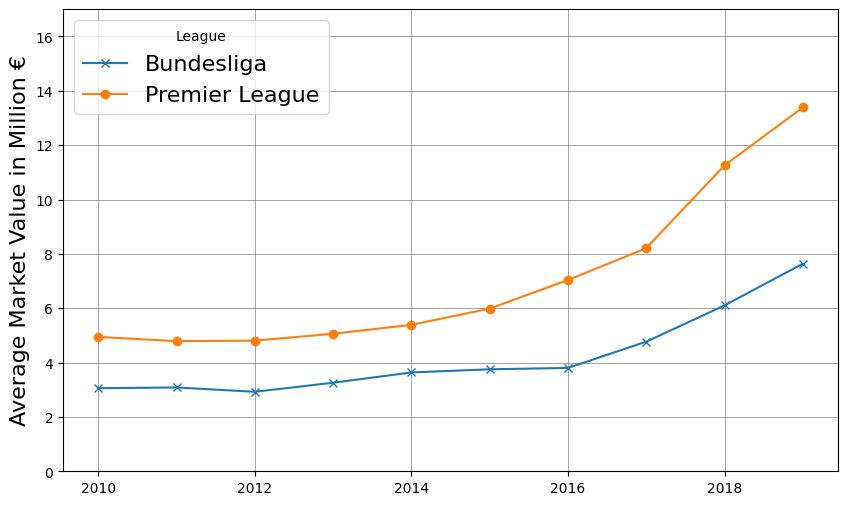

In [5]:
from matplotlib import ticker
import matplotlib.pyplot as plt


def get_market_value_per_season(df: pd.DataFrame):
    df_transfers = df[df["reason"].str.contains("regular interval")].copy()
    grouped = df_transfers.groupby(["season_id", "league"])["market_value"].mean().reset_index()
    return grouped


real_grouped = get_market_value_per_season(df)

markers = {"Bundesliga": "x", "Premier League": "o", None: "-"}

plt.style.use('default')

fig = plt.figure(figsize=(10, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

for league, data in real_grouped.groupby("league"):
    plt.plot(
        data["season_id"],
        data["market_value"],
        marker=markers.get(league, "o"),
        linestyle="-",
        label=league
    )

plt.ylim(0, 17)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain', axis='y')

# plt.xlabel("Season", fontsize=16)
plt.ylabel("Average Market Value in Million €", fontsize=16)
# ax.annotate("Average Market Value Per Season by League", xy=(0.5, -0.15), xycoords='axes fraction',
#             ha='center', va='top', fontsize=20)

plt.legend(title="League", fontsize=16)

plt.grid(True, color='grey', linestyle='-', linewidth=0.5)

plt.savefig("./saved/market_value_temporal.png", bbox_inches="tight", facecolor='white')
plt.show()